# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [37]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [38]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [39]:
# Info geral do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


Através da análise do método `.info()` podemos notar que o dataset tem 7 colunas sendo uma do tipo object, 5 do tipo int64 e uma do tipo float64 e também não conta com valores nulos, 

In [40]:
# Visualizar as colunas ajuda a entender como os dados estão distribuidos.
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos.de.Estudo', 'Renda', 'Altura'], dtype='object')

In [41]:
# Valores únicos por coluna
# O método nunique nos ajuda a identificar colunas do tipo qualitativa no dataset, pois mostrar a quantidade de elementos distintos.
dados.nunique()

UF                  27
Sexo                 2
Idade               84
Cor                  5
Anos.de.Estudo      17
Renda             1606
Altura              67
dtype: int64

#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [42]:
# Renomeando as colunas para facilitar a manipulação
old_columns = dados.columns
new_columns = ['estado', 'genero', 'idade', 'cor', 'anos_estudos', 'renda', 'altura']

dados.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)
dados.head()

,estado,genero,idade,cor,anos_estudos,renda,altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


In [43]:
quant_dados_estado = len(dados.estado.unique())

print(f'Na coluna UF temos exatamente a quantia de {quant_dados_estado} dados unicos, representando os 27 estados da federação.')

Na coluna UF temos exatamente a quantia de 27 dados unicos, representando os 27 estados da federação.


#### Gráfico com a quantidade de dados por Estado.

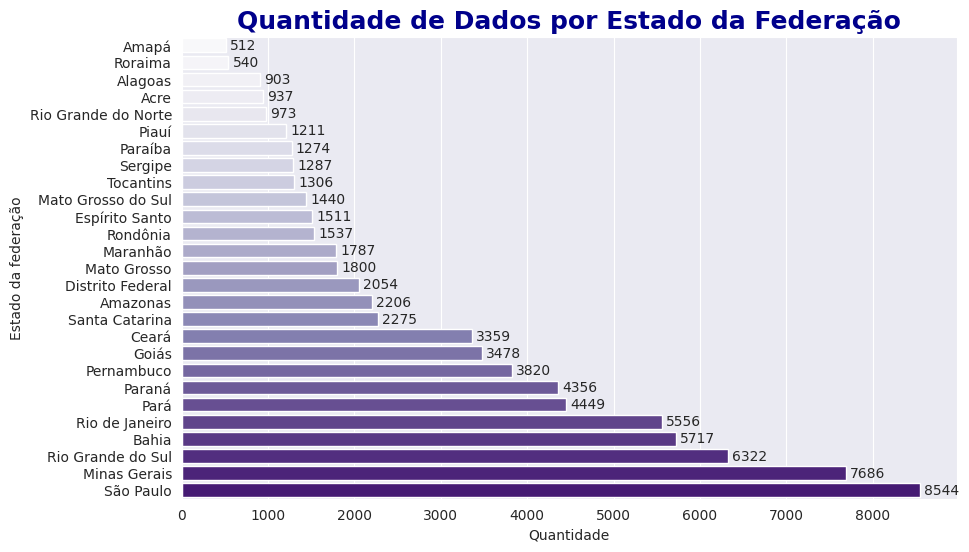

In [44]:
# Dados por estado
dados_estado = dados.estado.value_counts().sort_values(ascending=True).reset_index(name='quantidade')

sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_estado, x='quantidade', y='estado',hue='estado', palette='Purples')

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.0f', label_type='edge', padding=3)

ax.set_title("Quantidade de Dados por Estado da Federação", fontdict={'fontsize': 18, 'color':'darkblue', 'fontweight': 'bold'})
ax.set_xlabel("Quantidade")
ax.set_ylabel("Estado da federação")

plt.show()


## **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [45]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [46]:

dados.genero = dados.genero.map(sexo)   # Usando o map que recebe o dicionário com o valor atual e o valor novo 
dados.genero = dados.genero.astype('category') # Usando o método astype, transformando a coluna em categórica
dados.genero.value_counts() # Exibindo o resultado

genero
Masculino    53250
Feminino     23590
Name: count, dtype: int64

In [47]:
dados.genero.dtype # Confirmando o tipo da coluna

CategoricalDtype(categories=['Feminino', 'Masculino'], ordered=False, categories_dtype=object)

Usando o `CategoricalDtype` para classificar como `category` usando o **astype**

In [48]:
from pandas.api.types import CategoricalDtype
ordem = ['Masculino', 'Feminino']
category_ordened = CategoricalDtype(categories=ordem, ordered=True)
dados.genero = dados.genero.astype(category_ordened)
dados.genero.dtype

CategoricalDtype(categories=['Masculino', 'Feminino'], ordered=True, categories_dtype=object)

#### Gráfico da proporção de responsáveis pelo domicílio

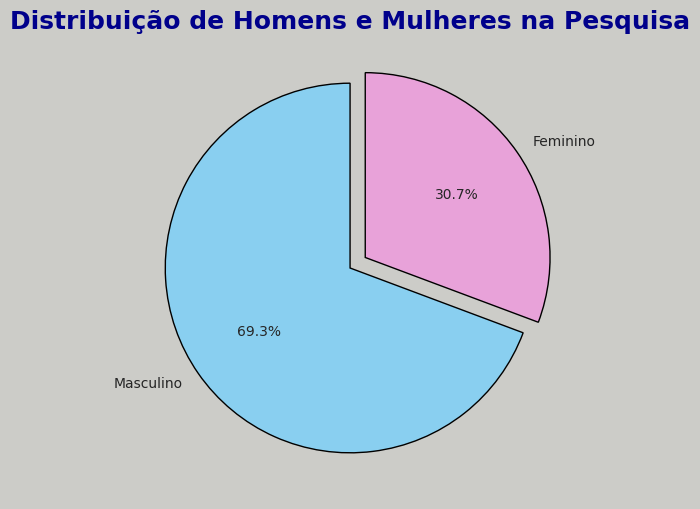

In [49]:
# Proporcao
proporcao_chefe_familia = dados.genero.value_counts(normalize=True).mul(100).round(2)
cores = ['#89CFF0', '#E8A2D9']
plt.figure(figsize=(10, 6), facecolor="#c9c9c5ef")
plt.pie(proporcao_chefe_familia, labels=proporcao_chefe_familia.keys(), autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=cores, wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title("Distribuição de Homens e Mulheres na Pesquisa",fontdict={'fontsize': 18, 'color':'darkblue', 'fontweight': 'bold'})
plt.show()

##### Cor

In [50]:
# mudando a coluna cor / Etnia
dados.cor = dados.cor.map(cor)
dados.cor.value_counts()

cor
Parda       35925
Branca      31815
Preta        8391
Indígena      357
Amarela       352
Name: count, dtype: int64

#### Gráfico da distribuição Étnica da pesquisa 

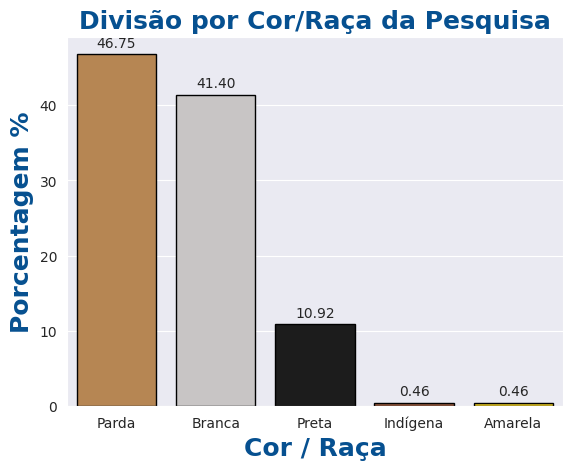

In [51]:
#  Dataframe com a divisão etnica
div_racial = dados.cor.value_counts(normalize=True).mul(100).round(2).reset_index(name='porcentagem')

cores_raca = {
    'Parda': '#C68642',
    'Branca': "#C9C4C4",
    'Preta': '#1C1C1C',
    'Indígena': '#A0522D',
    'Amarela': '#FFD700'
}
ax = sns.barplot(data=div_racial, x='cor', y='porcentagem',hue='cor', palette=cores_raca, edgecolor='black')

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Divisão por Cor/Raça da Pesquisa", fontdict={'fontsize':18, 'fontweight': 'bold', 'color': "#065090"})
ax.set_ylabel("Porcentagem %", fontdict={'fontsize':18, 'fontweight': 'bold', 'color': '#065090'})
ax.set_xlabel("Cor / Raça", fontdict={'fontsize':18, 'fontweight': 'bold', 'color': '#065090'})
plt.show()

##### Anos de Estudo

In [52]:
# Essa será uma coluna categórica que terá seus valores ordenados.
# Crio uma lista com os valores ordenados
valores_ordenados = sorted(dados.anos_estudos.unique())

# Passando os dados para o pd.Categorical
dados.anos_estudos = pd.Categorical(
    dados.anos_estudos,
    categories=valores_ordenados,
    ordered=True
)

In [53]:
# Realizando as mudançãs nas linhas
dados.anos_estudos= dados.anos_estudos.map(anos_de_estudo)

In [54]:
# Verificando o resultado
dados.anos_estudos.dtype

CategoricalDtype(categories=['Sem instrução e menos de 1 ano', '1 ano', '2 anos',
                  '3 anos', '4 anos', '5 anos', '6 anos', '7 anos', '8 anos',
                  '9 anos', '10 anos', '11 anos', '12 anos', '13 anos',
                  '14 anos', '15 anos ou mais', 'Não determinados'],
, ordered=True, categories_dtype=object)

#### Gráfico da quantidade de anos de estudos do responsável pelo domicílio

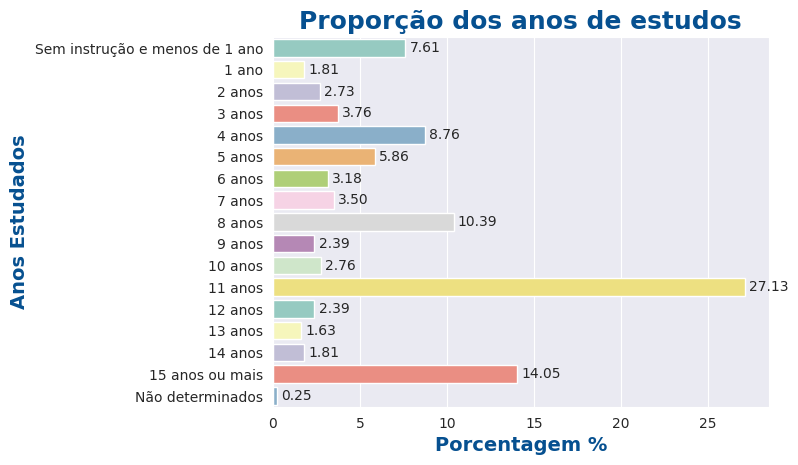

In [55]:
div_anos_estudos = dados.anos_estudos.value_counts(normalize=True).mul(100).round(2).reset_index(name='porcentagem')

ax = sns.barplot(data=div_anos_estudos, x='porcentagem', y='anos_estudos', hue='anos_estudos', palette='Set3')

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Proporção dos anos de estudos",fontdict={'fontsize':18, 'fontweight': 'bold', 'color': "#065090"})
ax.set_xlabel("Porcentagem %", fontdict={'fontsize':14, 'fontweight': 'bold', 'color': "#065090"})
ax.set_ylabel("Anos Estudados", fontdict={'fontsize':14, 'fontweight': 'bold', 'color': "#065090"})

plt.show()

#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [56]:
renda_min = dados.renda.min()
renda_max = dados.renda.max()


print(f"A renda mínima da pesquisa foi: R${renda_min:,.2f} enquanto a renda máxima foi: R${renda_max:,.2f}")


A renda mínima da pesquisa foi: R$0.00 enquanto a renda máxima foi: R$200,000.00


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [57]:
# Crio a tabela separada do df original, tendo como colunas o genero e a frequência absoluta.
tab_frequencias_genero = dados.genero.value_counts().reset_index(name='frequencia_abs')

# Crio uma nova coluna na tabela contendo a frequência relativa.
tab_frequencias_genero['frequencia_relativa %'] = round(tab_frequencias_genero.frequencia_abs/tab_frequencias_genero.frequencia_abs.sum()*100, 2)

# Exibindo os resultados
tab_frequencias_genero

,genero,frequencia_abs,frequencia_relativa %
0,Masculino,53250,69.3
1,Feminino,23590,30.7


O gráfico nos ajuda a mensurar melhor como está distribuída a proporção dos dados.

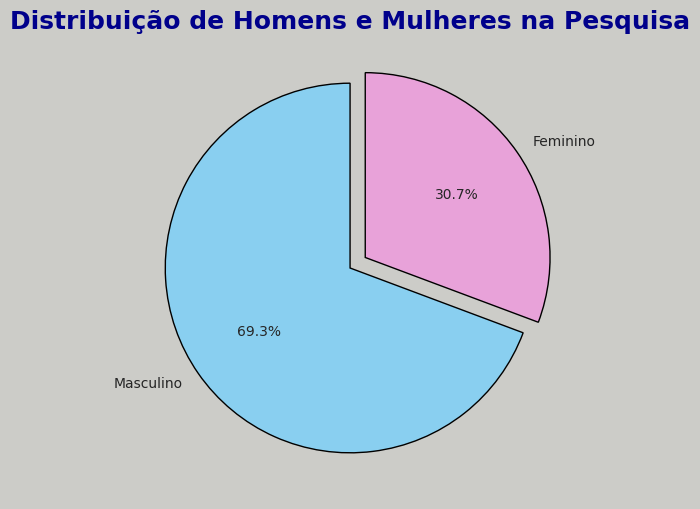

In [58]:
# Proporcao
proporcao_chefe_familia = dados.genero.value_counts(normalize=True).mul(100).round(2)
cores = ['#89CFF0', '#E8A2D9']
plt.figure(figsize=(10, 6), facecolor="#c9c9c5ef")
plt.pie(proporcao_chefe_familia, labels=proporcao_chefe_familia.keys(), autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=cores, wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title("Distribuição de Homens e Mulheres na Pesquisa",fontdict={'fontsize': 18, 'color':'darkblue', 'fontweight': 'bold'})
plt.show()

Observando a tabela e os gráfico, fica fácil notar que quase 70% da pesquisa foi respondida por homens enquanto as mulheres nessa pesquisa representam um pouco mais de 30%. O que difere um pouco de pesquisas mais recentes como a do censo 2022 [(veja aqui)](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/41663-censo-2022-em-12-anos-proporcao-de-mulheres-responsaveis-por-domicilios-avanca-e-se-equipara-a-de-homens) onde mostra que essa proporção já chega a ser de quase meio a meio, ou seja, 50% das mulheres responsáveis pelos seus lares.

#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [59]:
# Frequência Absoluta
frequencia_cor_genero = pd.crosstab(dados.genero,dados.cor)

frequencia_cor_genero

cor,Amarela,Branca,Indígena,Parda,Preta
genero,,,,,
Masculino,235,22194,256,25063,5502
Feminino,117,9621,101,10862,2889


In [60]:
# # Frequência Relativa
freq_relativa_cor_genero = pd.crosstab(dados.cor,dados.genero, normalize='all').mul(100).round(2)
freq_relativa_cor_genero


genero,Masculino,Feminino
cor,,
Amarela,0.31,0.15
Branca,28.88,12.52
Indígena,0.33,0.13
Parda,32.62,14.14
Preta,7.16,3.76


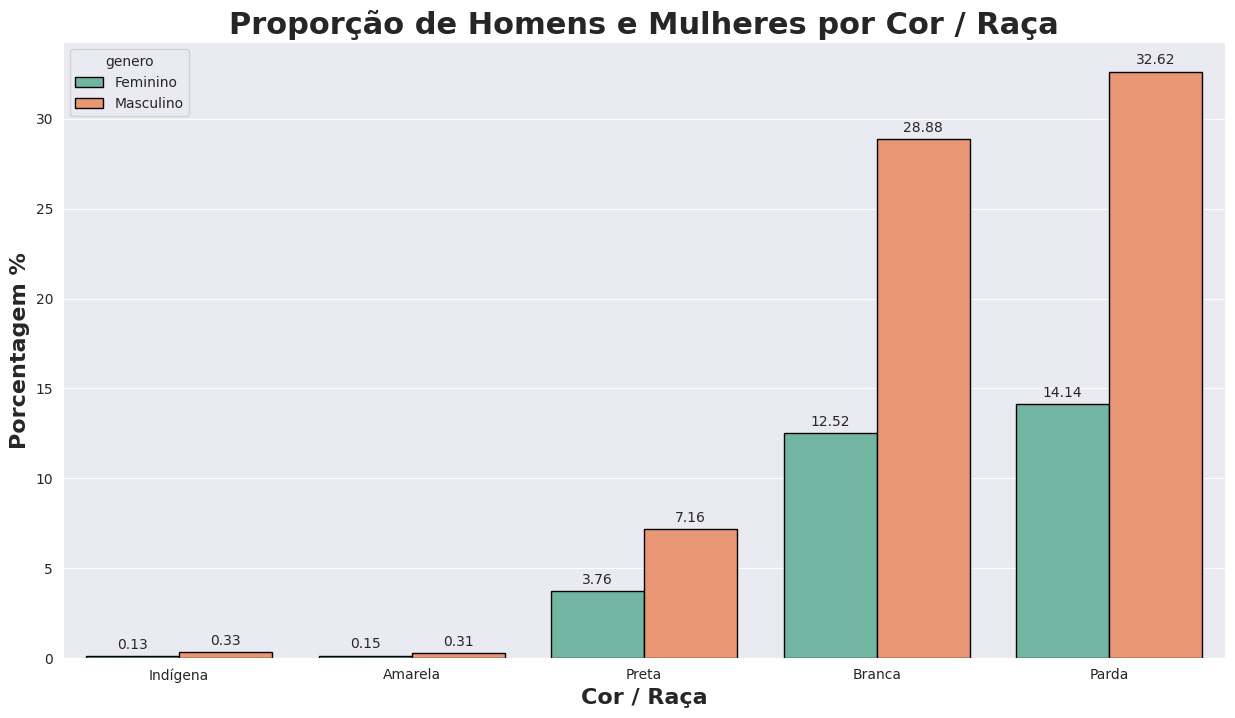

In [61]:
# Usando os dados em tabular padrão com a função melt()

freq_relativa_cor_genero_plot = freq_relativa_cor_genero.reset_index().melt(id_vars='cor', var_name='genero', value_name='valor').sort_values(by='valor')

# Plotando o gráfico
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=freq_relativa_cor_genero_plot, x='cor', y='valor', hue='genero', palette='Set2', edgecolor='black')

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Proporção de Homens e Mulheres por Cor / Raça", fontdict={'fontsize': 22, 'fontweight': 'bold'})

ax.set_xlabel("Cor / Raça",fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_ylabel("Porcentagem %", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


> #### Conclusões

Nessa pesquisa, a proporção de homens é um pouco maior que o dobro quase que em autodeclaradas cores / raça, com exceção das pessoas que se identificaram como pretas onde essa diferença é um pouco menor. Revelando uma predominância masculinas em todas elas. Também é possível destacar que a população preta, amarela e ingígena representam menos de 15% do total pesquisado.

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [62]:
renda_media_cor_sexo = pd.crosstab(dados.genero, dados.cor, values=dados.renda, aggfunc='mean').round(2)

renda_media_cor_sexo 

cor,Amarela,Branca,Indígena,Parda,Preta
genero,,,,,
Masculino,4758.25,2925.74,1081.71,1659.58,1603.86
Feminino,3027.34,2109.87,2464.39,1176.76,1134.60


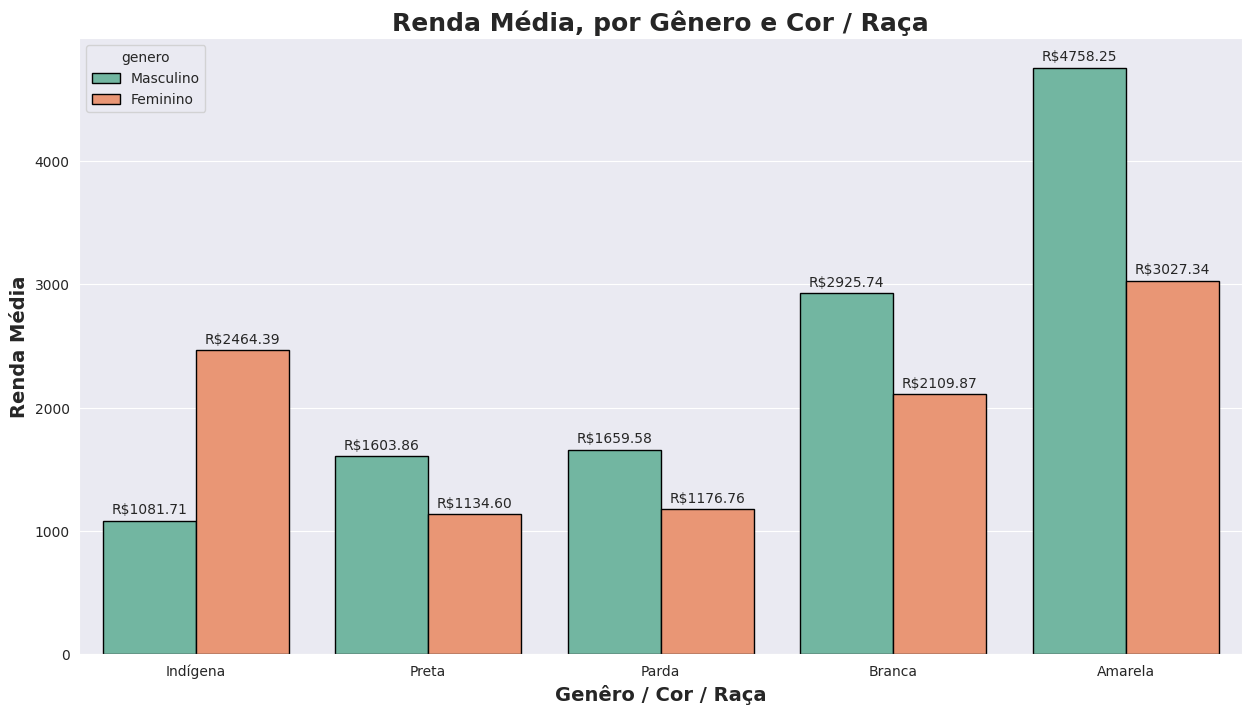

In [63]:

renda_media_cor_sexo_plot = renda_media_cor_sexo.reset_index().melt(
    id_vars='genero',
    var_name='cor',
    value_name='valor'
).sort_values(by='valor')

plt.figure(figsize=(15, 8))
ax = sns.barplot(data=renda_media_cor_sexo_plot, x='cor', y='valor', hue='genero', palette='Set2',edgecolor='black')

for container in ax.containers:
    ax.bar_label(container=container, fmt='R$%.2f', label_type='edge', padding=3)

ax.set_title("Renda Média, por Gênero e Cor / Raça", fontdict={'fontsize': 18, 'fontweight': 'bold'})

ax.set_xlabel("Genêro / Cor / Raça", fontdict={'fontsize': 14, 'fontweight': 'bold'})

ax.set_ylabel("Renda Média", fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.show()

> #### Conclusões

O Grupo auto-declarado como amarelo, tem a maior renda média, mesmo o grupo feminino tem renda maior que as demais cores / raças incluindo as do sexo masculino, e isso é um fato curioso e um demonstrativo visto que essa etnia representa apenas 0.46% do público pesquisado, mostrarndo uma forte concentração de renda média. As menores rendas médias são dos grupos auto-declados Pretos e Pardos, onde nesses também tem a menor diferença de renda média por gênero. Totalmente fora do padrão geral onde os homens ganham quase que o dobro da renda média feminina, na etnia indígena, são as mulheres que levam vantagem com um pouco mais do dobro da renda médias dos homens de mesma etnia.

In [64]:
dados.cor.value_counts(normalize=True).mul(100).round(2)

cor
Parda       46.75
Branca      41.40
Preta       10.92
Indígena     0.46
Amarela      0.46
Name: proportion, dtype: float64

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

#### Para relembrar:
* **Média**: O valor obtido pela soma de todos os elementos e dividida pelo número total de elementos.
* **Mediana**: É o valor central de um conjunto de dados ***ordenados***.
* **Moda**: É o valor com maior frequência, o valor que mais se repete em um conjunto de dados.

In [65]:
media, mediana = dados.renda.describe()[['mean', '50%']].round(2)

print(f'A renda média é de: R${media:,.2f}')
print(f'A renda mediana é de: R${mediana:,.2f}')
print(f'Com uma diferença de R${media - mediana:.2f} podemos caracterizar essa tendência central como assimétrica.')
print(f'A critério de curiosidade a moda da é : R$ {dados.renda.mode().item():.2f}')

A renda média é de: R$2,000.38
A renda mediana é de: R$1,200.00
Com uma diferença de R$800.38 podemos caracterizar essa tendência central como assimétrica.
A critério de curiosidade a moda da é : R$ 788.00


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [66]:
cinco_maiores_rendas_medias = dados.groupby('estado')['renda'].mean().sort_values(ascending=False).head().reset_index()
cinco_maiores_rendas_medias

,estado,renda
0,Distrito Federal,4241.954722
1,São Paulo,2638.104986
2,Rio de Janeiro,2496.403168
3,Paraná,2493.870753
4,Santa Catarina,2470.854945


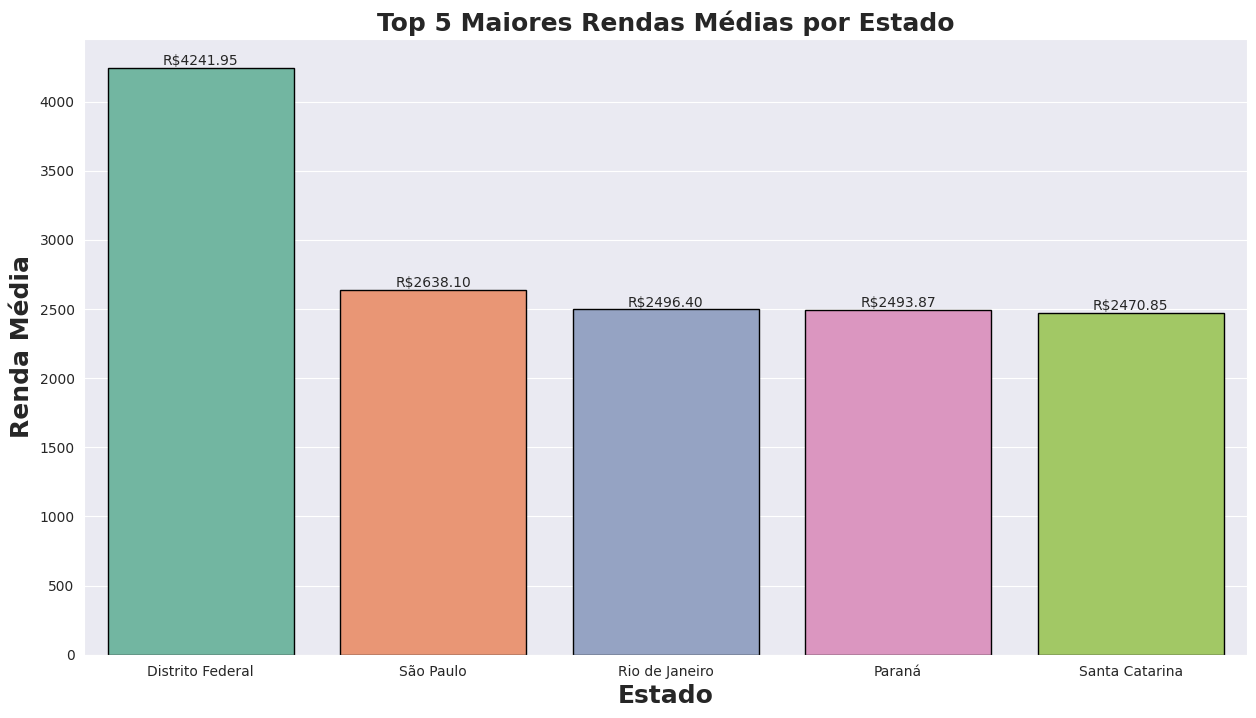

In [67]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cinco_maiores_rendas_medias, x='estado', y='renda', edgecolor='black', palette='Set2', hue='estado')

for container in ax.containers:
    ax.bar_label(container, fmt='R$%.2f')

ax.set_title("Top 5 Maiores Rendas Médias por Estado", fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xlabel("Estado", fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_ylabel("Renda Média", fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.show()

In [68]:
ibge_raw = 'br_ibge_populacao_uf.csv'
dados_ibge = pd.read_csv(ibge_raw)
dados_ibge.sample(3)


FileNotFoundError: [Errno 2] No such file or directory: 'br_ibge_populacao_uf.csv'

Buscando dados sobre a população dos top 5 estados no ano de 2015 no site do [IBGE](https://basedosdados.org/dataset/d30222ad-7a5c-4778-a1ec-f0785371d1ca?table=b99f0017-e587-477e-8cfb-05fb5d1005b8)

In [ ]:
populacao = dados_ibge[(dados_ibge.sigla_uf.isin(['DF', 'SP', 'RJ', 'SC','PR']) & (dados_ibge.ano == 2015))][['sigla_uf','populacao']].sort_values(by='populacao')
populacao

,sigla_uf,populacao
654,DF,2914830
671,SC,6819190
665,PR,11163018
666,RJ,16550024
673,SP,44396484


PLotando o gráfico com a população desses estados naquele ano.

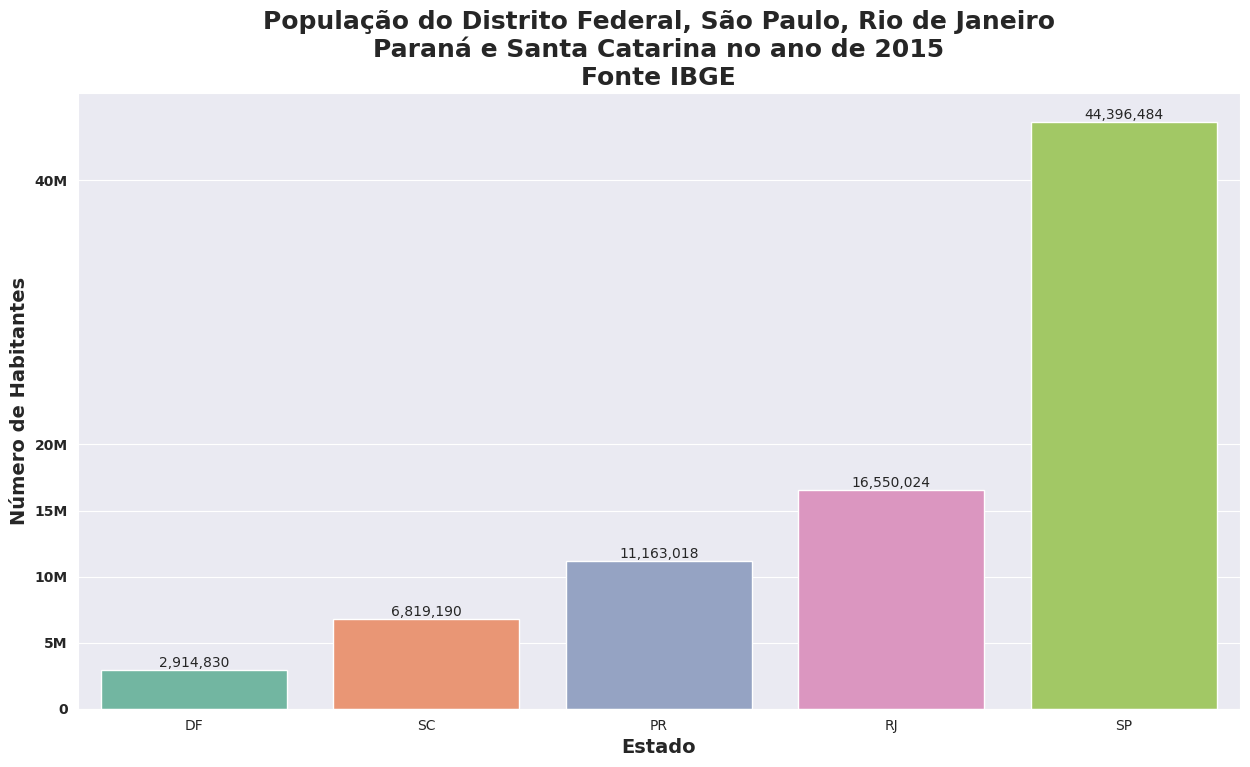

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=populacao, x='sigla_uf', y='populacao', hue='sigla_uf', palette='Set2')

for container in ax.containers:
    ax.bar_label(container=container, fmt='{:,.0f}'.format)

ax.set_title("População do Distrito Federal, São Paulo, Rio de Janeiro\nParaná e Santa Catarina no ano de 2015\nFonte IBGE", fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xlabel("Estado", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Número de Habitantes", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 40000000])
ax.set_yticklabels(['0', '5M', '10M', '15M', '20M', '40M'], fontdict={'fontweight':'bold'})

plt.show()

> #### Conclusões

O distrito federal ambora sendo o menor ente da federação em extenção territórial e população no ano pesquisado, tem a maior renda média dos 5, ou seja, uma renda concentrada, muito possívelmente pelo fato de ser a capital federal,e onde está localizado os poderes centrais do país, chegando a ter quase que o dobre do estados mais populoso que é São Paulo. Os demais quatro estados tem renda média semelhante de ~ R$ 2.500,00.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [ ]:
estados_sudeste = ['São Paulo','Minas Gerais','Rio de Janeiro','Espírito Santo']

regiao_sudeste = dados[dados.estado.isin(estados_sudeste)]
regiao_sudeste.sample(5)

,estado,genero,idade,cor,anos_estudos,renda,altura
38796,Minas Gerais,Masculino,23,Branca,11 anos,1300,1.70
33309,Minas Gerais,Masculino,28,Parda,11 anos,1400,1.67
52601,São Paulo,Feminino,31,Branca,11 anos,2500,1.76
40614,Espírito Santo,Feminino,60,Branca,11 anos,1380,1.71
45842,Rio de Janeiro,Feminino,54,Preta,11 anos,1000,1.67


Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`

##### **Média**

In [ ]:

media_sal_regiao_genero = pd.crosstab(
    regiao_sudeste.genero, 
    regiao_sudeste.estado, 
    values=regiao_sudeste.renda,
    aggfunc='mean'
    ).round(2)
media_sal_regiao_genero

estado,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
genero,,,,
Masculino,2129.32,2283.16,2777.55,2947.74
Feminino,1752.71,1489.62,1971.53,1950.18


Gráfico da média de salários da região sudeste por gênero

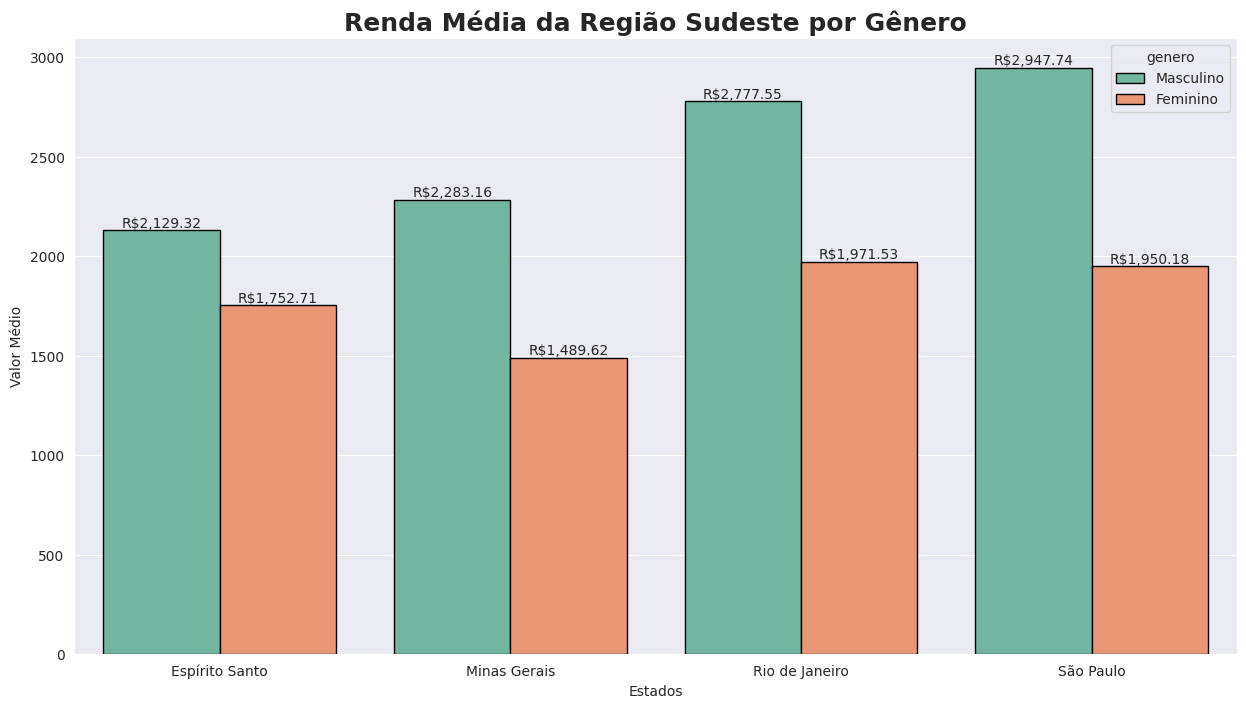

In [ ]:

media_sal_regiao_genero_plot = media_sal_regiao_genero.reset_index().melt(
    id_vars='genero',
    var_name='estado',
    value_name='valor'
)

plt.figure(figsize=(15,8))
ax = sns.barplot(data=media_sal_regiao_genero_plot, x='estado', y='valor', hue='genero', palette='Set2', edgecolor='black')

for container in ax.containers:
    ax.bar_label(container=container, fmt=lambda x: f'R${x:,.2f}')

ax.set_title("Renda Média da Região Sudeste por Gênero",fontdict={'fontsize':18,'fontweight':'bold'})
ax.set_xlabel("Estados")
ax.set_ylabel("Valor Médio")

plt.show()

##### **Mediana**

In [ ]:
pd.crosstab(
    regiao_sudeste.genero, 
    regiao_sudeste.estado, 
    values=regiao_sudeste.renda,
    aggfunc='median'
    )

estado,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
genero,,,,
Masculino,1500.0,1400.0,1510.0,1820.0
Feminino,927.0,900.0,1040.5,1200.0


##### **Renda Máxima**

In [ ]:
renda_max_sudeste_genero = pd.crosstab(
    regiao_sudeste.genero, 
    regiao_sudeste.estado, 
    values=regiao_sudeste.renda,
    aggfunc='max'
    )
renda_max_sudeste_genero 

estado,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
genero,,,,
Masculino,40000,100000,200000,80000
Feminino,100000,30000,120000,50000


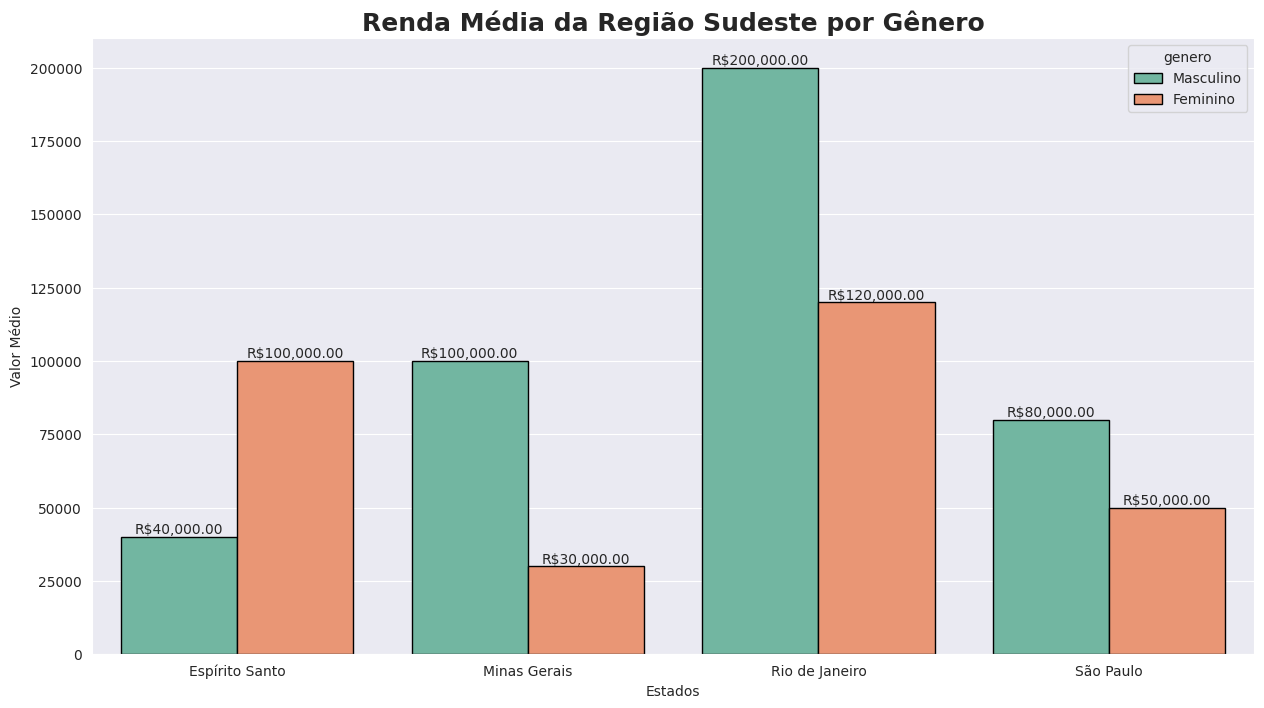

In [ ]:
renda_max_sudeste_genero_plot = renda_max_sudeste_genero.reset_index().melt(
    id_vars='genero',
    var_name='estado',
    value_name='valor'
)

plt.figure(figsize=(15,8))
ax = sns.barplot(data=renda_max_sudeste_genero_plot, x='estado', y='valor', hue='genero', palette='Set2', edgecolor='black')

for container in ax.containers:
    ax.bar_label(container=container, fmt=lambda x: f'R${x:,.2f}')

ax.set_title("Renda Média da Região Sudeste por Gênero",fontdict={'fontsize':18,'fontweight':'bold'})
ax.set_xlabel("Estados")
ax.set_ylabel("Valor Médio")

plt.show()

In [ ]:
regiao_sudeste.query('renda == 100000')

,estado,genero,idade,cor,anos_estudos,renda,altura
32379,Minas Gerais,Masculino,46,Parda,15 anos ou mais,100000,1.72
37497,Minas Gerais,Masculino,72,Branca,15 anos ou mais,100000,1.64
37612,Minas Gerais,Masculino,61,Branca,15 anos ou mais,100000,1.58
40934,Espírito Santo,Feminino,71,Branca,15 anos ou mais,100000,1.79
43679,Rio de Janeiro,Feminino,65,Branca,11 anos,100000,1.77


> #### Conclusões

No estado do Espírito Santo é o único onde a renda máxima feminina é maior que a masculina, chegando a uma diferença de R$ 60.000,00. Nos demais estados o padrão de renda max masculina se repete, com destaque para MG onde a diferença entre homem e mulher é de R$ 70.000,00. Mas é no Rio de Janeiro que está a maior diferença com homem ganhando R$ 80.000,00 a mais que a mulher. O estado de São Paulo é o de menor diferença entre gênero no máximo salarial.

### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

Para criar uma curva de densidade, precisamos calcular o número de classes na qual serão divididos nossos dados, nesse caso os dados das colunas `altura` e `Idade`. Para isso irei utilizar a regra de **Sturges**. 

A regra de **Sturges** é uma fórmula estatística usada para determinar o número ideal de classes ou intervalos ao criar um ***histograma*** a partir de um conjunto de dados.

# $$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.

In [ ]:
import math
quant_amostras = dados.shape[0]
num_classes = 1 + (10/3) * math.log10(quant_amostras)
num_classes = int(num_classes)

print(f'A quantidade de classes para o número de dados do nosso Dataframe: {num_classes}')
num_classes

A quantidade de classes para o número de dados do nosso Dataframe: 17


17

Vou criar uma cópia do DataFrame para não alterar os dados originais

In [ ]:
dados_histograma = dados.copy()
dados_histograma.sample(5)

,estado,genero,idade,cor,anos_estudos,renda,altura
69740,Mato Grosso,Masculino,46,Branca,8 anos,1500,1.51
27117,Bahia,Masculino,28,Parda,8 anos,788,1.79
52371,São Paulo,Masculino,32,Preta,11 anos,1770,1.62
56483,Paraná,Feminino,49,Branca,4 anos,1200,1.61
32455,Minas Gerais,Feminino,30,Preta,11 anos,1000,1.61


De posse do número de classes e da Cópia do nosso dataframe, vamos plotar o histograma da curva de densidade primeiro para altura

##### **Altura**

In [ ]:
dados_histograma['faixa_altura'] = pd.cut(dados_histograma.altura, bins=num_classes, include_lowest=True)

In [ ]:
dados_histograma.sample(5)

,estado,genero,idade,cor,anos_estudos,renda,altura,faixa_altura
20776,Pernambuco,Masculino,50,Parda,Sem instrução e menos de 1 ano,788,1.79,"(1.786, 1.827]"
9525,Pará,Masculino,39,Parda,15 anos ou mais,4000,1.60,"(1.584, 1.624]"
62370,Rio Grande do Sul,Masculino,53,Branca,15 anos ou mais,5000,1.77,"(1.746, 1.786]"
25360,Sergipe,Masculino,45,Parda,8 anos,1580,1.74,"(1.705, 1.746]"
4230,Amazonas,Feminino,45,Parda,9 anos,300,1.65,"(1.624, 1.665]"


In [ ]:
tab_frequencia_altura = dados_histograma.faixa_altura.value_counts().reset_index(name='quantidade')
tab_frequencia_altura['frequencia %'] = round(tab_frequencia_altura.quantidade / tab_frequencia_altura.quantidade.sum()*100, 2)

tab_frequencia_altura.head(5)

,faixa_altura,quantidade,frequencia %
0,"(1.665, 1.705]",15041,19.57
1,"(1.705, 1.746]",14484,18.85
2,"(1.624, 1.665]",12079,15.72
3,"(1.746, 1.786]",10713,13.94
4,"(1.584, 1.624]",7728,10.06


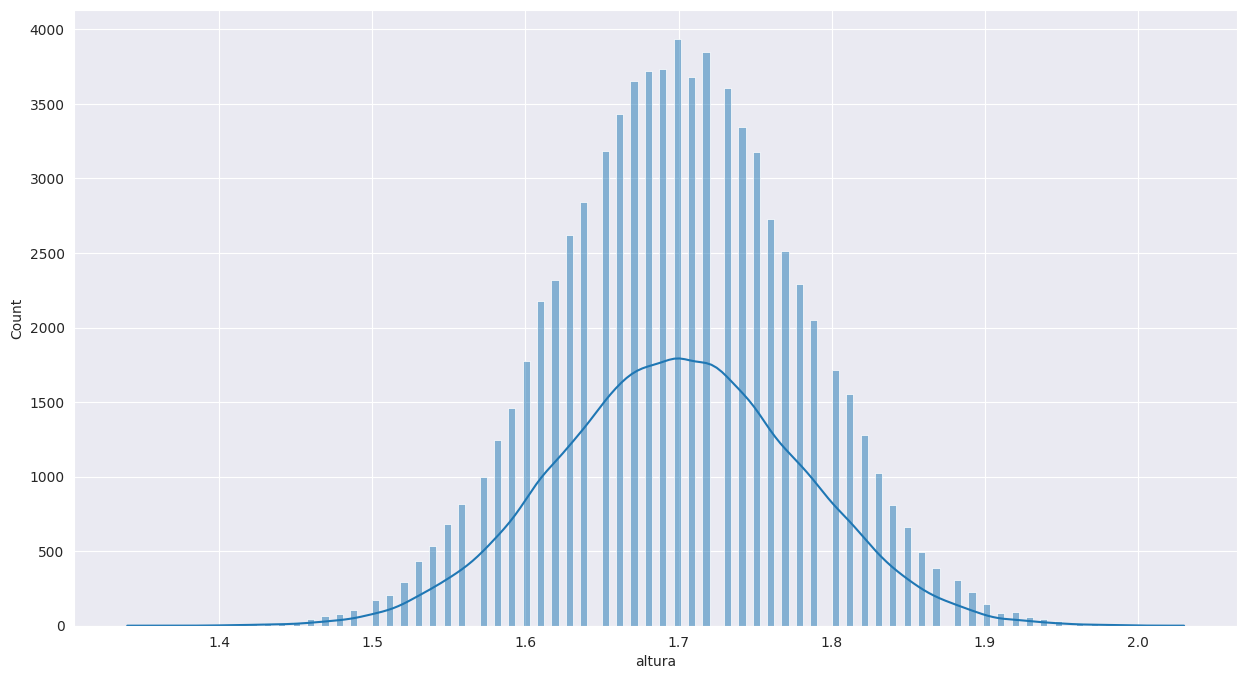

In [ ]:
plt.figure(figsize=(15,8))

sns.histplot(data=dados_histograma, x='altura', kde=True)

plt.show()

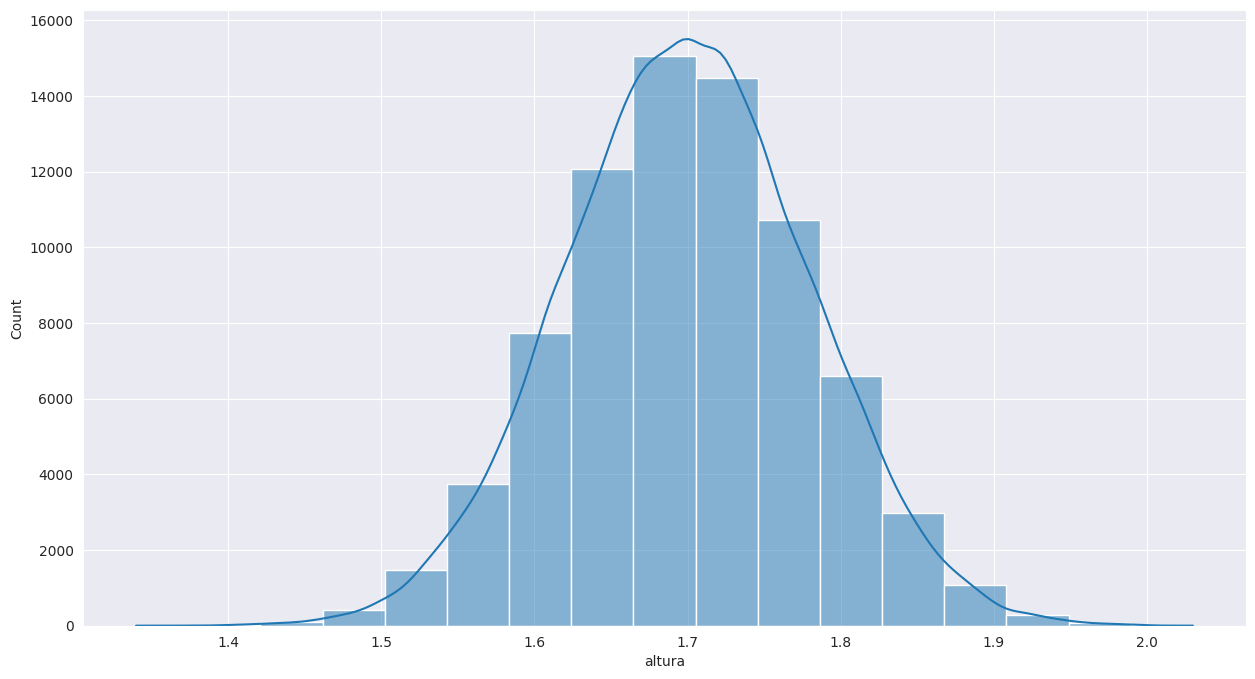

In [ ]:
plt.figure(figsize=(15,8))

sns.histplot(data=dados_histograma, x='altura', bins=num_classes, kde=True)

plt.show()

> #### Conclusões

Nosso histograma revela uma tendência central assimétrico, com a maioria dos dados girando em torno de 1.66 a 1.70.

##### **Idade**

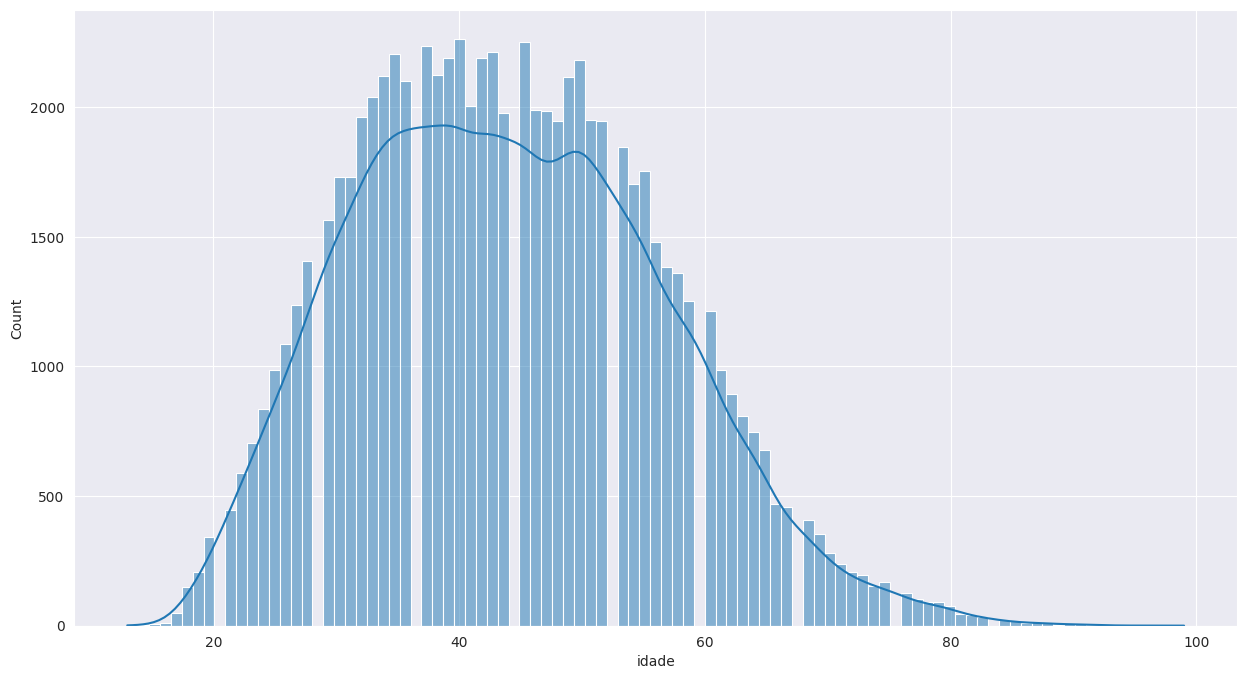

In [ ]:
plt.figure(figsize=(15,8))

sns.histplot(data=dados_histograma, x='idade',  kde=True)

plt.show()

<Axes: xlabel='idade', ylabel='Count'>

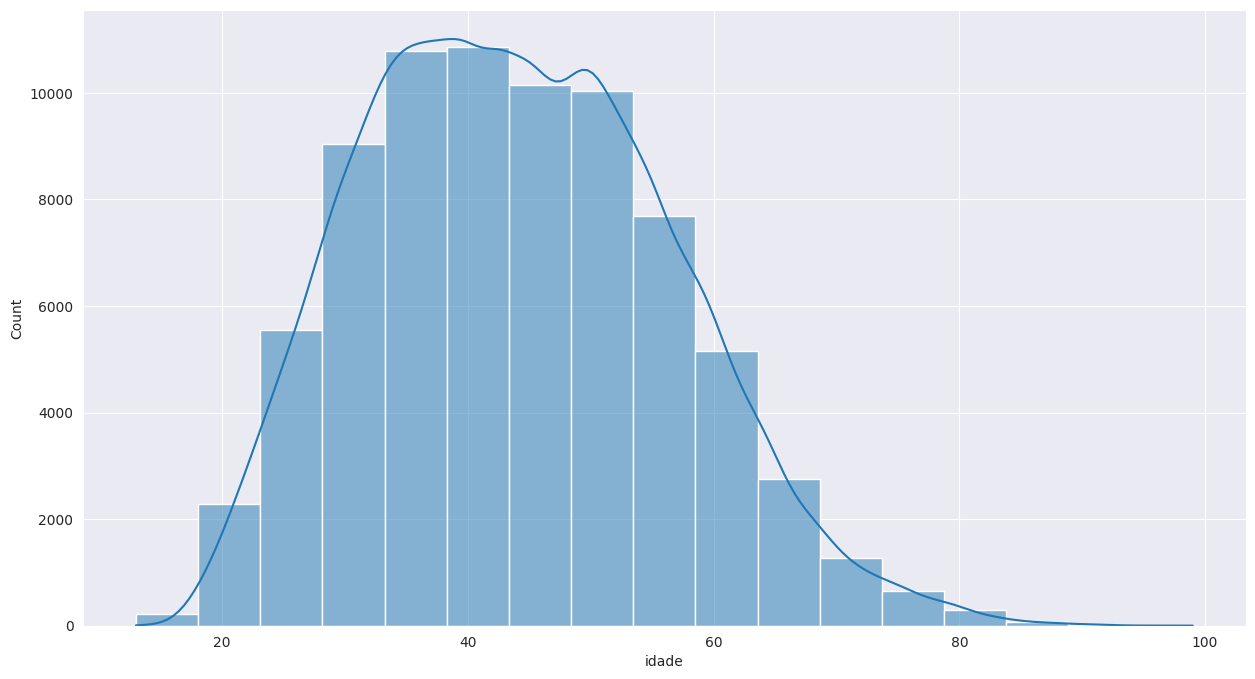

In [ ]:
plt.figure(figsize=(15,8))

sns.histplot(data=dados_histograma, x='idade', bins=num_classes, kde=True)

> #### Conclusões

Já na coluna `Idade` temos uma tendência assimétrica à direta

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [ ]:
# Filtro para pegar apenas a renda menor ou igual a 15k
dados_until_15k = dados[dados.renda <= 15000]
dados_until_15k.shape[0]

76219

In [79]:
# Usando a formula de Sturgues para definir o numero de classes
n = dados_until_15k.shape[0]
k = int(1 + (10/3) * math.log10(n))
print(f'Temos {k} classes para a quantidade de dados de até 15k de renda.')


Temos 17 classes para a quantidade de dados de até 15k de renda.


In [ ]:
# Criando a coluna faixa de renda.
dados_until_15k['faixa_renda'] = pd.cut(dados_until_15k.renda, bins=k, include_lowest=True)

,estado,genero,idade,cor,anos_estudos,renda,altura,faixa_renda
0,Rondônia,Masculino,23,Parda,11 anos,800,1.60,"(-15.001, 882.353]"
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.74,"(882.353, 1764.706]"
2,Rondônia,Feminino,35,Parda,14 anos,880,1.76,"(-15.001, 882.353]"
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.78,"(2647.059, 3529.412]"
4,Rondônia,Feminino,47,Parda,8 anos,150,1.69,"(-15.001, 882.353]"


In [90]:
dados_until_15k.head()

,estado,genero,idade,cor,anos_estudos,renda,altura,faixa_renda
0,Rondônia,Masculino,23,Parda,11 anos,800,1.60,"(-15.001, 882.353]"
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.74,"(882.353, 1764.706]"
2,Rondônia,Feminino,35,Parda,14 anos,880,1.76,"(-15.001, 882.353]"
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.78,"(2647.059, 3529.412]"
4,Rondônia,Feminino,47,Parda,8 anos,150,1.69,"(-15.001, 882.353]"


In [146]:
tab_frequencia_faixa_renda = dados_until_15k.faixa_renda.value_counts().round(2).reset_index(name='quant_pessoas')
tab_frequencia_faixa_renda['porcentagem %'] = round(tab_frequencia_faixa_renda.quant_pessoas / tab_frequencia_faixa_renda.quant_pessoas.sum(),4)*100
tab_frequencia_faixa_renda

,faixa_renda,quant_pessoas,porcentagem %
0,"(-15.001, 882.353]",26311,34.52
1,"(882.353, 1764.706]",25816,33.87
2,"(1764.706, 2647.059]",10905,14.31
3,"(2647.059, 3529.412]",4854,6.37
4,"(4411.765, 5294.118]",2180,2.86
5,"(3529.412, 4411.765]",2133,2.80
6,"(5294.118, 6176.471]",1002,1.31
7,"(6176.471, 7058.824]",672,0.88
8,"(9705.882, 10588.235]",662,0.87
9,"(7941.176, 8823.529]",554,0.73


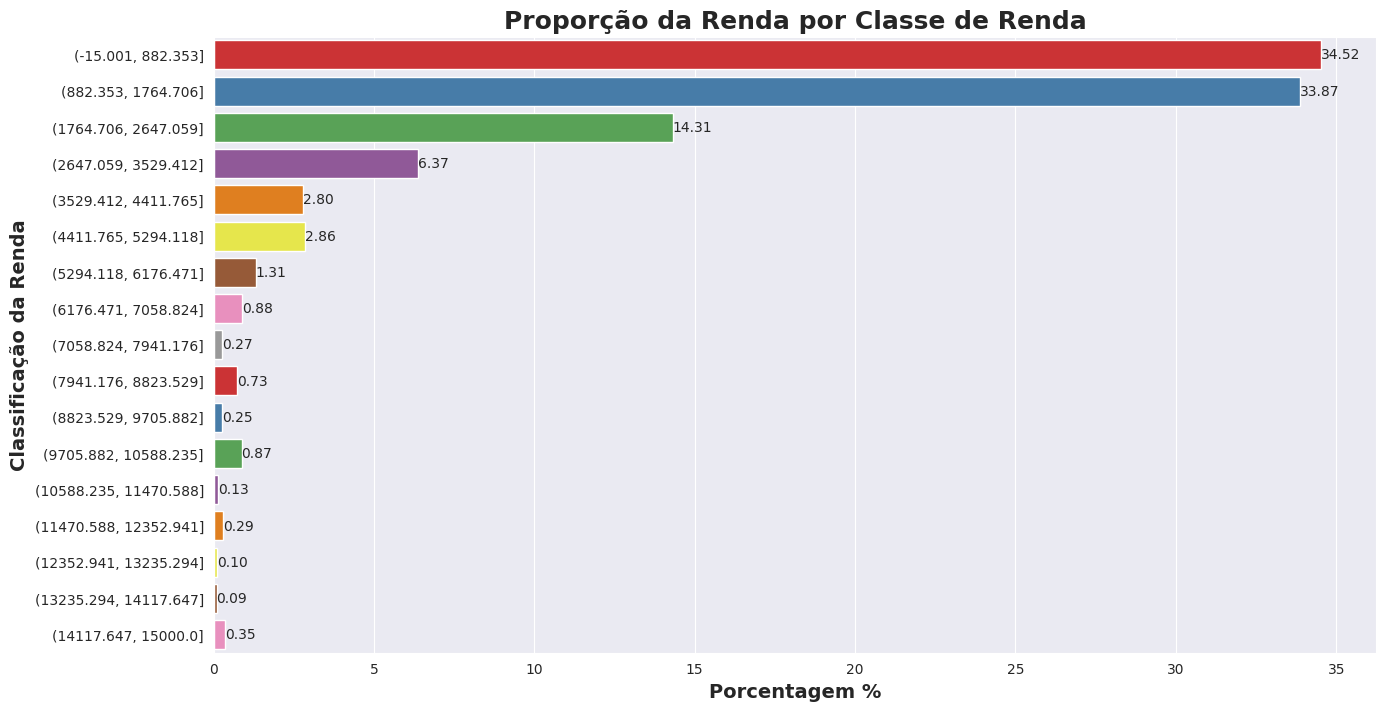

In [132]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=tab_frequencia_faixa_renda, y='faixa_renda', x='porcentagem %', hue='faixa_renda', palette='Set1', legend=False)

for container in ax.containers :
    ax.bar_label(container=container, fmt='%.2f')

plt.title("Proporção da Renda por Classe de Renda", fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Classificação da Renda", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Porcentagem %", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



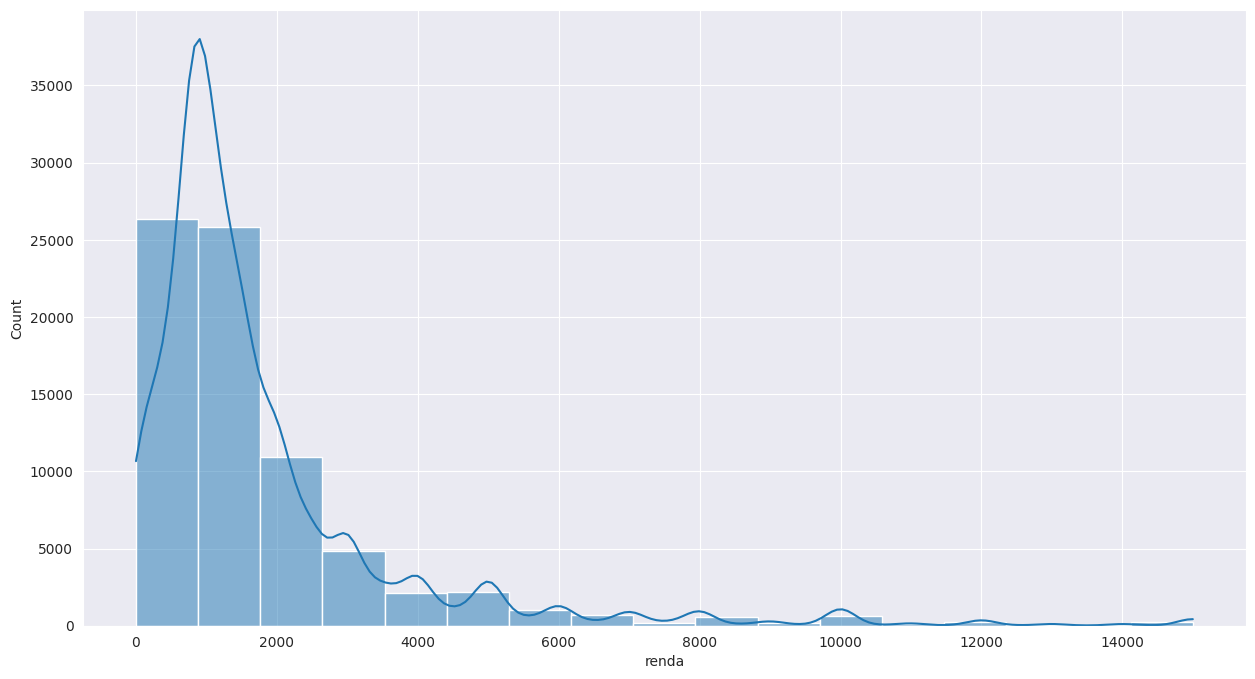

In [89]:
#sns.histplot(data=dados_histograma, x='idade', bins=num_classes, kde=True)
plt.figure(figsize=(15, 8))

sns.histplot(data=dados_until_15k, x='renda', bins=k, kde=True)

plt.show()

> #### Conclusões

Observando o histograma da renda, é fácil percerber a curva assimétrica à direita demonstrando uma assimetria positiva, o que significa que a maioria dos valores estão **concentrados na parte mais baixa** do eixo horizontal, ou seja, há uma cauda long à direita, ou seja, poucos valores muito altos que puxam a média para cima.  

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [149]:
total_pesquisado = dados.shape[0]
total_ate_salario = dados.query('renda <= 788')['renda'].count()
resultado = round((total_ate_salario * 100) / total_pesquisado, 2)

print(f'{resultado} % das pesssoas pesquisadas ganhavam até um salário mínimo.')

28.87 % das pesssoas pesquisadas ganhavam até um salário mínimo.


In [154]:
resultado = round((dados.query('renda <= 788')['renda'].shape[0] / dados.shape[0]) * 100, 2)
print(f'{resultado} % das pesssoas pesquisadas ganhavam até um salário mínimo.')

28.87 % das pesssoas pesquisadas ganhavam até um salário mínimo.


##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [158]:
resultado = dados.renda.quantile(0.95)
print(f'A renda máxima de 95% das pessoas responsáveis é de: R$ {resultado:,.2f}')

A renda máxima de 95% das pessoas responsáveis é de: R$ 6,000.00


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [160]:
resultado = dados.renda.quantile(0.99)
print(f'A renda mínima do 1% das pessoas mais bem pagas é de: R$ {resultado:,.2f}')

A renda mínima do 1% das pessoas mais bem pagas é de: R$ 15,000.00


##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [196]:
quantiles_ate6k = dados.query('renda <= 6000')['renda'].describe()[['25%','50%', '75%']].reset_index()
quantiles_ate6k 


,index,renda
0,25%,788.0
1,50%,1200.0
2,75%,2000.0


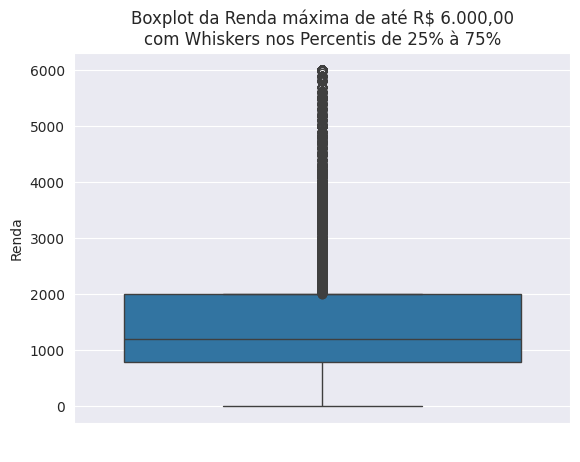

In [197]:
ate_6k = dados.query('renda <= 6000')
sns.boxplot(y=ate_6k.renda, whis=[0.25,0.75])
plt.title("Boxplot da Renda máxima de até R$ 6.000,00\ncom Whiskers nos Percentis de 25% à 75%")
plt.ylabel("Renda")
plt.xlabel(" ")

plt.show()

> #### Conclusões

Analisando o boxplot nota-se que a mediana está próxima de R$ 1.000,00 e isso indica que metade dos responsáveis pela pesquisa ganham até esse valor. O intervalo **interquartil(IQR)** vai de R$ 788,00 à R$ 2.000,00, ou seja, metade do público pesquisado está nessa faixa. Fora dos IQR temons muitos **outliers** visíveis que são pontos acima R$ 2.000,00 chegando até R$ 6.000,00. 

Em resumo pode-se notar que a renda é concentrada nas faixas mais baixas e alguns poucos indivíduos puxam a curva para cima, mostrando uma dispersão relevante para os valores mais altos assim como uma assimetria à direita sugerindo que a distribuição de renda é positivamente assimétrica, ou seja, poucos ganham muito mais.

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

<Axes: xlabel='cor', ylabel='renda'>

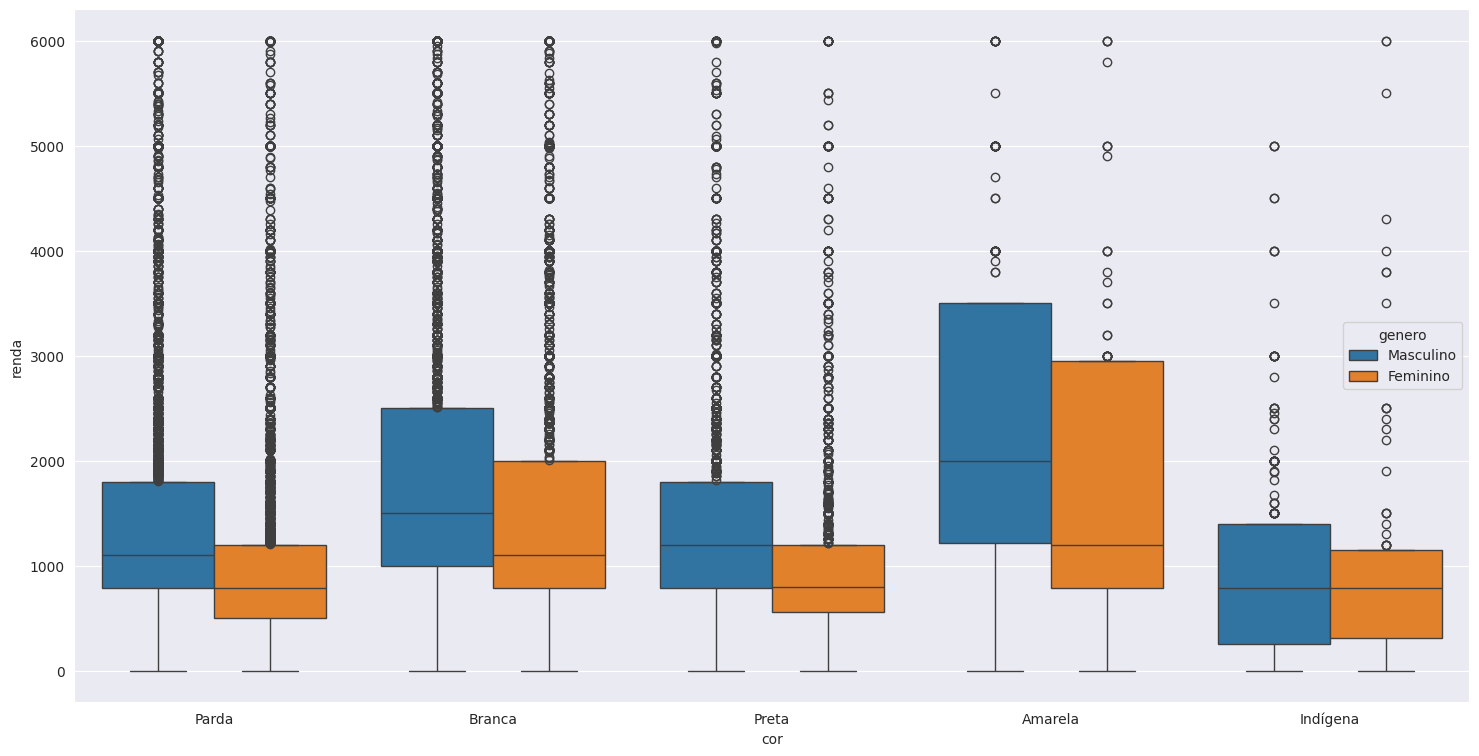

In [210]:
plt.figure(figsize=(18,9))
sns.boxplot(y=ate_6k.renda, x=ate_6k.cor,hue=ate_6k.genero, whis=[0.25,0.95])

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

In [204]:
idade_limite = dados.idade.quantile(.2)

dados_idade_limite = dados[dados['idade']<=idade_limite]

In [ ]:
sns.histplot(data=dados_idade_limite, x=)

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

> #### Conclusões

Escreva suas conclusões aqui...

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

##### **Média**

##### **Mediana**

##### **Desvio Padrão**

> #### Conclusões

Escreva suas conclusões aqui...